# CWRU 轴承故障诊断数据集
## 振动信号
## 正常工况、内圈故障、外圈故障、滚动体故障
- 训练集 测试集：400x4 8:2
- 样本大小：1x1024x1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
data = np.loadtxt("./fault_data/CSWU_4Class.txt")
print(data.shape)

(1600, 1024)


In [5]:
# create training set and testing set
train_data = np.vstack((data[0: 320, :], data[400: 720, :], data[800: 1120, :], data[1200: 1520, :]))
test_data = np.vstack((data[320: 400, :], data[720: 800, :], data[1120: 1200, :], data[1520: 1600, :]))

print(train_data.shape, test_data.shape)

# make label
train_label = np.vstack((np.zeros((320, 1), dtype = int), np.full((320, 1), 1), np.full((320, 1), 2), np.full((320, 1), 3)))
test_label = np.vstack((np.zeros((80, 1), dtype = int), np.full((80, 1), 1), np.full((80, 1), 2), np.full((80, 1), 3)))

train_label = train_label.reshape(-1)
test_label = test_label.reshape(-1)

print(train_label.shape, test_label.shape)

# 打乱样本
train_data, train_label = sklearn.utils.shuffle(train_data, train_label, random_state= 1)

(1280, 1024) (320, 1024)
(1280,) (320,)


In [6]:
clf = LogisticRegression(max_iter= 200)

In [7]:
clf.fit(train_data, train_label)

LogisticRegression(max_iter=200)

In [8]:
# 测试集准确率
clf.score(test_data, test_label)

0.675

In [9]:
print(clf.coef_, clf.intercept_)

[[ 0.16864086  0.15804494  0.30762431 ...  0.3678884   0.27762931
   0.20751829]
 [-0.08218242 -0.35632894 -0.08907999 ... -0.17217509 -0.06680509
   0.10221569]
 [ 0.20849448  0.27288855  0.22950967 ... -0.40071361 -0.39157583
  -0.34915244]
 [-0.29495291 -0.07460454 -0.448054   ...  0.2050003   0.18075161
   0.03941846]] [-1.82838103  2.12149095 -0.6794666   0.38635667]


In [11]:
len(clf.coef_)

4

In [12]:
len(clf.coef_[0])

1024

In [14]:
y_pre = clf.predict(test_data)
print(len(y_pre))

320


In [15]:
y_pre[0: 10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# confusion matraix

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [17]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[80  0  0  0]
 [ 0 65  3 12]
 [ 8 29 30 13]
 [ 0 32  7 41]]


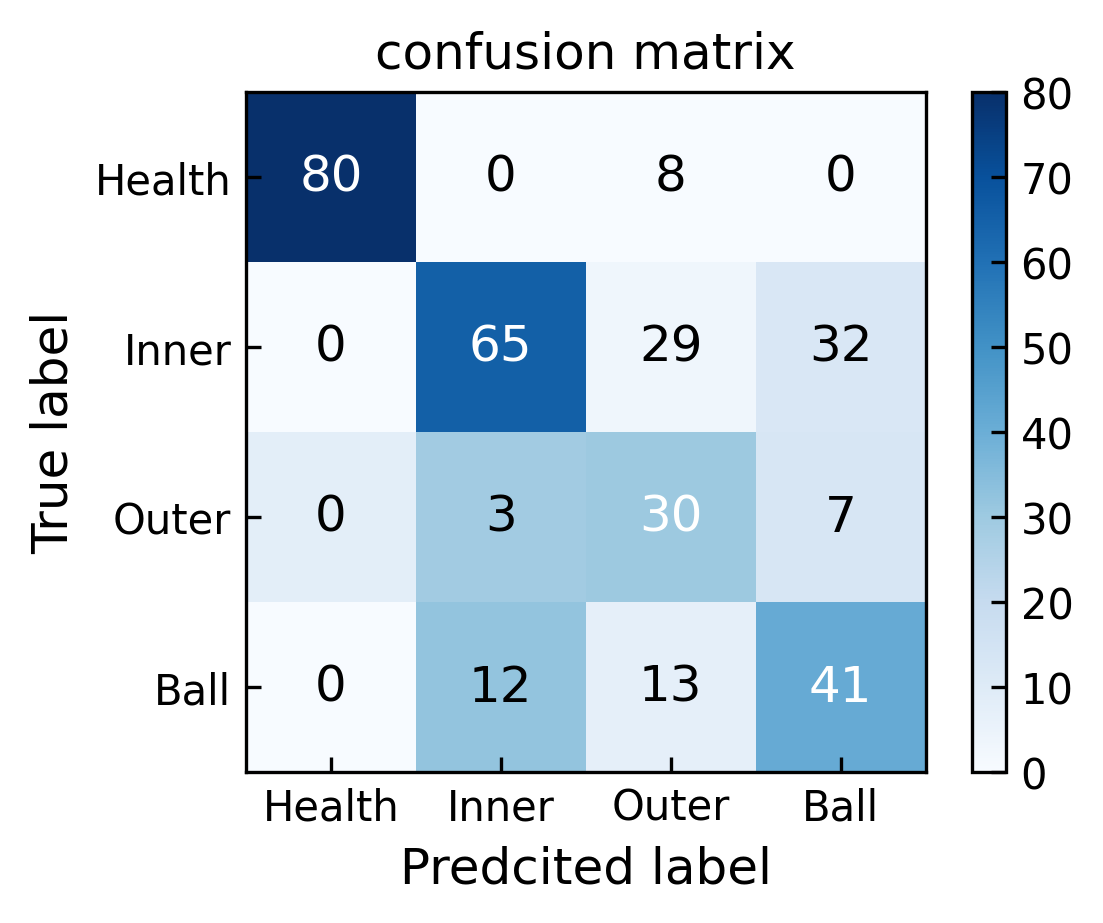

In [19]:
y_true = test_label
y_pre = y_pre

class_name = ["Health", "Inner", "Outer", "Ball"]
plot_confusion_matrix(y_true, y_pre, class_name)